# Question 2
## Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) = P(ω2)

ω1 = [1,-1; 2,-5; 3,-6; 4,-10; 5,-12; 6,-15]

ω2 = [-1,1; -2,5; -3,6; -4,10, -5,12; -6, 15]

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from sympy import *

# Definations


In [2]:
def cov_inv(w):
    w_cov=np.cov(w.transpose())
    return w_cov,np.linalg.inv(w_cov)

def get_mean(w):
    return np.mean(w,axis=0)

def get_X():
    x,y=symbols('x y')
    X=np.array([x,y]).transpose()
    return x,y,X

def get_equation(X,w_mean,w_cov,w_inv,pw):
    Term_1 = -0.5*(np.dot(np.subtract(X,w_mean).transpose(),np.dot(w_inv,np.subtract(X,w_mean))))
    Term_2 = -(w_cov.shape[0]/2)*np.log(2*np.pi)
    Term_3 = -0.5*np.log(np.linalg.det(w_cov))
    Term_4 = np.log(pw)
    return Term_1+Term_2+Term_3+Term_4

# Following two functions are used to plot the points and the line together.

def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    backend._process_series(backend.parent._series, ax, backend.parent)
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)
    
def plot(w1,w2,g,x,y):
    p1 = plot_implicit(g, (x, -20, 20), (y, -20, 20), show=False)
    fig, ax = plt.subplots()
    move_sympyplot_to_axes(p1, ax)

    plt.setp(ax.yaxis.get_label(), 'rotation', 0)
    plt.scatter([x[0] for x in w1 ],[x[1] for x in w1 ],label="Class W1")
    plt.scatter([x[0] for x in w2 ],[x[1] for x in w2 ],label="Class W2")
    plt.title(label='Decision Boundary', fontsize='20', pad='20')
    plt.legend()
    plt.show()


In [3]:
def get_result(w1,w2,pw1,pw2):
    
    w1_cov,w1_inv=cov_inv(w1)
    w2_cov,w2_inv=cov_inv(w2)

    w1_mean=get_mean(w1)
    w2_mean=get_mean(w2)

    x,y,X=get_X()

    g1=get_equation(X,w1_mean,w1_cov,w1_inv,pw1)
    g2=get_equation(X,w2_mean,w2_cov,w2_inv,pw2)

    g=g1-g2

    if((w1_cov==w2_cov).all() and (w1_cov[0][1]==0 and w1_cov[1][0]==0)):
        print("\nsFollowing are the covariance matrix of the given classes:\n\nClass W1 Covariance Matrix:\n",w1_cov,"\n\nClass W2 Covariance Matrix:\n",w2_cov,"\n\nCase 1 of Baye's Decision Boundary(Since Covariance Matrices are equal and of form 1):\n")
    
    elif((w1_cov==w2_cov).all()):
        print("\nsFollowing are the covariance matrix of the given classes:\n\nClass W1 Covariance Matrix:\n",w1_cov,"\n\nClass W2 Covariance Matrix:\n",w2_cov,"\n\nCase 2 of Baye's Decision Boundary(Since Covariance Matrices are equal but not of form 1):\n")
    
    else:
        print("\nsFollowing are the covariance matrix of the given classes:\n\nClass W1 Covariance Matrix:\n",w1_cov,"\n\nClass W2 Covariance Matrix:\n",w2_cov,"\n\nCase 3 of Baye's Decision Boundary(Since Covariance Matrices are not equal):\n")
    plot(w1,w2,g,x,y)

# Main


Following are the covariance matrix of the given classes:

Class W1 Covariance Matrix:
 [[ 3.5        -9.5       ]
 [-9.5        26.16666667]] 

Class W2 Covariance Matrix:
 [[ 3.5        -9.5       ]
 [-9.5        26.16666667]] 

Case 2 of Baye's Decision Boundary(Since Covariance Matrices are equal but not of form 1):



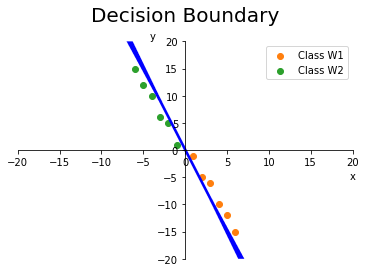

In [4]:
w1=np.array([[1,-1], [2,-5], [3,-6], [4,-10], [5,-12], [6,-15]])
w2=np.array([[-1,1], [-2,5], [-3,6], [-4,10], [-5,12], [-6,15]])
pw1=0.3
pw2=0.7
get_result(w1,w2,pw1,pw2)